## 파일 입출력

In [34]:
import os
os.getcwd() # 파일경로 알려주는 문법 ( pwd 같은 )

'/Users/kimsinwoo/Desktop/multicampus/python/ml'

In [35]:
import pandas as pd

sample_df = pd.DataFrame({"col1" : [1,2], "col2" : [3,4]})
sample_df # 파일평 test.csv 파일로

# 경로지정해서 출력, 그냥 지금 폴더에 생성하려면 test_csv 만 적으면 됨.
# 경로를 잘못 지정하면 OS Error 가 났다고 표시, 에러 코드 라인과 맨 마지막 줄 에러 만 확인하면 된다.

sample_df.to_csv("output/sample/test.csv", index = False) # 인덱스에 특별한 값이 있다고 하면 index = True

### 파일 불러오기
- sample 폴더 안에 test.csv 불러오기

In [36]:
# CSV 파일 불러오기
df = pd.read_csv(filepath_or_buffer = "./output/sample/test.csv")
df

,col1,col2
0,1,3
1,2,4


- df_boston

In [37]:
df_boston = pd.read_csv("./data/boston.csv")
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00


## 열 및 행 선택
- CRIM, ZN, INDUS 열을 선택함
  

In [38]:
#result = df_boston[['CRIM','ZN','INDUS']]

cols = ['CRIM','ZN','INDUS'] # 리스트로 따로 받는게 좋음
result = df_boston[cols]
result.head(2)

# key error : 컬럼이 없거나, 오타

,CRIM,ZN,INDUS
0,0.01,18.00,2.31
1,0.03,0.00,7.07


- JN 이 18.0에 해당하는 행만 추출

In [39]:
result = df_boston.loc[df_boston['ZN'] == 18.0]
result.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00


In [40]:
# 행 추출의 기본원리는 조건문 - 판다스에서 조건문을 사용하는 방식
# 1.여기서 True 값만 가져오기
df_boston['ZN'] == 18.0 

0       True
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: ZN, Length: 506, dtype: bool

In [41]:
# 2. df로 감싸기
df_boston[df_boston['ZN'] == 18.0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00


- AGE 가 50 이상인 데이터만 추출

In [42]:
result = df_boston[df_boston['AGE'] >= 50] #
result  # 인덱스 번호가 비는 번호 발생 > 인덱스 재정렬 필요

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
5,0.03,0.00,2.18,0.00,0.46,6.43,58.70,6.06,3.00,222.00,18.70,394.12,5.21,28.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00


In [43]:
# 인덱스 추출 포함 (행추출 시 인덱스 재정렬은 필수)
result = df_boston[df_boston['AGE'] >= 50].reset_index(drop = True)
result

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
4,0.03,0.00,2.18,0.00,0.46,6.43,58.70,6.06,3.00,222.00,18.70,394.12,5.21,28.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
355,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
356,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
357,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00


- INDUS 가 5.0 이상이면서 B 가 394 이상인 데이터 추출

In [44]:
# result = df_boston[(조건식1) & (조건식2) | (조건식3)] 이렇게 틀을 만들어보고 코드 실행해보고 하나씩 집어넣는 빙식

result = df_boston[(df_boston['INDUS'] >= 5.0) & (df_boston['B'] >= 394)].reset_index(drop = True)
result.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60


## iloc 와 loc 차이
행과 열에 접근 방식의 차이
- loc : 레이블 or boolean 값 사용
- iloc : 인덱스 값 사용

- iloc 로만 활용해서 추출

In [45]:
df_boston.iloc[0:3][['CRIM','ZN','INDUS']]

,CRIM,ZN,INDUS
0,0.01,18.00,2.31
1,0.03,0.00,7.07
2,0.03,0.00,7.07


- loc 활용해서 추출

In [46]:
df_boston.iloc[0:3][['CRIM','ZN','INDUS']]
df_boston[['CRIM','ZN','INDUS']].loc[0:2]

,CRIM,ZN,INDUS
0,0.01,18.00,2.31
1,0.03,0.00,7.07
2,0.03,0.00,7.07


In [47]:
df_boston.iloc[0:3,0:3]

,CRIM,ZN,INDUS
0,0.01,18.00,2.31
1,0.03,0.00,7.07
2,0.03,0.00,7.07


In [48]:
df_boston.loc[0:2,['CRIM','ZN','INDUS']]

,CRIM,ZN,INDUS
0,0.01,18.00,2.31
1,0.03,0.00,7.07
2,0.03,0.00,7.07


### iloc 대신 loc 를 써야하는 이유

In [49]:
result = df_boston.iloc[df_boston['INDUS'] >= 5.0,['CRIM','ZN','INDUS']]
result.head()

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [ ]:
# iloc 사용시 에러남 > loc 에러 안남(행과 열을 같이 사용해야 하니까 loc 가 편리)

result = df_boston.loc[(df_boston['INDUS'] >= 5.0) & (df_boston['B'] >= 394) # 행
                        ,['CRIM','ZN','INDUS']].reset_index(drop = True) #열
result.head()

## 결측치 다루기

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(0) # 숫자를 무작위로 추출, 코드를 실행할 떄마다 같은 난수 생성 - 실험조건을 동일하게 맞추기 위해
data = np.random.randint(0,10, size = (10,3), astype = float)

In [ ]:
data[data

In [ ]:
df = pd.DataFrame(data,columns = ['col1','col2','col3']) #외부에서 새로운 데이터 가져옴
df.info()

In [ ]:
df.isna().sum()

In [ ]:
# 평균으로 결측치 대치 해보기
df['col1'].fillna(df['col1'].mean(axis = 0),inplace = True)

In [ ]:
df = pd.DataFrame({
    "이름": ["Evan", "Sara", "Chris", "Messi", "Woods", "Jordan"], 
    "국어": [70, 90, None, None, 100, 85], 
    "영어": [65, 100, None, 90, 70, 80]
})

df

## 행추가

In [57]:
df.loc[6,"이름":"영어"] = ["kim",50,60]
df

ValueError: Must have equal len keys and value when setting with an iterable

In [58]:
# 국어점수가 90점 이상이면 "A"
# 국어점수가 80점~89점 "B"
# 국어점수가 70점~79점 "C"
# 나머지는 F
df['등급'] = "F"

for index, row in df.iterrows():
    
    if row['국어'] >= 90:
        df.loc[index, '등급'] = 'A'
    elif row['국어'] >= 80:
        df.loc[index, '등급'] = 'B'
    elif row['국어'] >= 70:
        df.loc[index, '등급'] = 'C'

df



KeyError: '국어'

In [51]:
df['등급'] = df['국어'].apply(lambda score: 'A' if score >= 90 else ('B' if score >= 80 else ('C' if score >= 70 else 'F')))
df

KeyError: '국어'

- np.where 조건식 한번만 적용(if 조건식, 참일 때, 거짓일 때)
- np.where(조건식, 참, np.where(조건식, 참, 거짓)))

- np.select(다중조건식, 다중결과값, default = ' ') - default 는 else랑 같은 기능

In [ ]:
# numpy 와 pandas 연계
condition_list = [(df["국어"] >= 90), (df['국어'] >= 80) & (df['국어'] < 90), (df['국어'] >= 70) & (df['국어'] < 80)]
choice_list = ["A", "B", "C"]
df['점수'] = np.select(condition_list, choice_list, default = "F")
df

## 날짜 데이터 핸들링
- 데이터 타입에 따라 해당되는 클래스가 달라짐
  

In [ ]:
date_string = "2023-03-02"
type(date_string)

In [ ]:
datetime_obj = pd.to_datetime(date_string)

print(datetime_obj)
type(datetime_obj)
print(type(datetime_obj))

In [ ]:
date_list = ["2023-03-02"]
print(type(date_list))

datetime_obj = pd.to_datetime(date_list)
print(datetime_obj)
print(type(datetime_obj))

## 데이터 가져오기
- raw_sales.csv 가져오기

In [ ]:
sales = pd.read_csv('./data/raw_sales.csv')
sales

In [ ]:
sales.info()

In [ ]:
sales.head()

In [ ]:
# 연도, 월, 일 로 칼럼 만들기
sales['Year'] = sales['datesold'].str.split('-').str[0]
sales['Month'] = sales['datesold'].str.split('-').str[1]
sales['Day'] = sales['datesold'].str.split('-').str[2]

In [ ]:
sales.info()

- 날짜 데이터 변환

In [ ]:
sales['datesold'] = pd.to_datetime(sales['datesold'])

In [ ]:
sales.info()

In [ ]:
sales['Year'] = sales['datesold'].dt.year
sales['Month'] = sales['datesold'].dt.month
sales['day'] = sales['datesold'].dt.day

In [ ]:
sales.info()

In [ ]:
sales = pd.read_csv('./data/raw_sales.csv')
sales

In [ ]:
# 연도, 월, 일 로 칼럼 만들기
sales['Year'] = sales['datesold'].str.split('-').str[0]
sales['Month'] = sales['datesold'].str.split('-').str[1]
sales['Day'] = sales['datesold'].str.split('-').str[2]

In [ ]:
sales.info()

## shift 기능
- 전일 대비, 전주 대비 등 비교에 용이함

In [ ]:
temp_df =sales.loc[:,['datesold','price']].copy()
temp_df.head(3)

In [ ]:
# shift(1, fill_value = 0)
temp_df['shifted_v1'] = temp_df['price'].shift(1,fill_value = 0).astype(int) #fill_value : na 가 뜨는 곳 0으로 처리
temp_df['diff'] = temp_df['price'] - temp_df['shifted_v1']
temp_df.head(3)

In [ ]:
# shift(2, fill_value = 0)
temp_df['shifted_v2'] = temp_df['price'].shift(2,fill_value = 0).astype(int) # 두칸 내려감 
temp_df['diff2'] = temp_df['price'] - temp_df['shifted_v2']
temp_df.head(3)

In [ ]:
# shift(-1, fill_value = 0)
temp_df =sales.loc[:,['datesold','price']].copy() # 거꾸로 올라감
temp_df['shifted_v3'] = temp_df['price'].shift(-1,fill_value = 0).astype(int) # 두칸 내려감 
temp_df['shifted_v4'] = temp_df['price'].shift(-2,fill_value = 0).astype(int)
temp_df.tail(3)

In [ ]:
sales.info()

In [ ]:
# sales['한글날짜'] = 코드작성 예) 2007년 02월 07일
sales['datesold'] = pd.to_datetime(sales['datesold'])
sales['한글날짜'] = sales['datesold'].dt.strftime('%y년 %m월 %d일')
sales.head()

## 결측치 이상치 데이터 핸들링

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import scipy
import seaborn as sns

print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(statsmodels.__version__)
print(scipy.__version__)
print(sns.__version__)

In [ ]:
DATA_PATH = './'
covidtotals = pd.read_csv(DATA_PATH + "data/covidtotalswithmissings.csv")

In [ ]:
covidtotals.info()

In [ ]:
pd.set_option('display.width', 40)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
covidtotals = covidtotals.set_index('iso_code')

In [ ]:
covidtotals.head()

### 결측치 처리
- 인구통계 컬럼에서 결측치 데이터를 확인
- 컬럼 방향으로 결측치의 개수를 파악함
- 5가지 인구 통계 변수 중에서 3개가 누락된 곳, 4개가 누락된 곳 확인

In [ ]:
totvars = ['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita', 'hosp_beds']

In [ ]:
covidtotals[demovars].isnull().sum(axis = 0)

In [52]:
covidtotals.iloc[2:4,:]

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
DZA,2020-06-01,Algeria,9394,653,214.22,14.89,"43,851,043.00",17.35,29.10,"13,913.84",1.90
AND,2020-06-01,Andorra,764,51,"9,888.05",660.07,"77,265.00",163.75,NaN,NaN,NaN


In [53]:
# 결측치가 3개인 곳 찾아야함
demovars_misscnt = covidtotals[demovars].isnull().sum(axis = 1)
demovars_misscnt

iso_code
AFG    0
ALB    0
DZA    0
AND    3
AGO    1
      ..
VNM    0
ESH    3
YEM    0
ZMB    0
ZWE    0
Length: 210, dtype: int64

In [54]:
demovars_misscnt.value_counts()

0    156
1     24
2     12
3     10
4      8
Name: count, dtype: int64

### 미션 1.
- 결측치가 3개 이상인 데이터를 추출하세요!
- ['location'] + demovars
  

In [55]:
covidtotals.loc[demovars_misscnt >= 3, ['location'] + demovars].T # T 행 열 전환

iso_code,AND,AIA,BES,VGB,FRO,FLK,GIB,GRL,GGY,IMN,JEY,XKX,MSR,MNP,TWN,TCA,VAT,ESH
location,Andorra,Anguilla,Bonaire Sint Eustatius and Saba,British Virgin Islands,Faeroe Islands,Falkland Islands,Gibraltar,Greenland,Guernsey,Isle of Man,Jersey,Kosovo,Montserrat,Northern Mariana Islands,Taiwan,Turks and Caicos Islands,Vatican,Western Sahara
population,"77,265.00","15,002.00","26,221.00","30,237.00","48,865.00","3,483.00","33,691.00","56,772.00","67,052.00","85,032.00","101,073.00","1,932,774.00","4,999.00","57,557.00","23,816,775.00","38,718.00",809.00,"597,330.00"
pop_density,163.75,NaN,NaN,207.97,35.31,NaN,"3,457.10",0.14,NaN,147.87,NaN,NaN,NaN,119.88,NaN,37.31,NaN,NaN
median_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.20,NaN,NaN,28.40
gdp_per_capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hosp_beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Index Alignment
- 인덱스 값끼리 연산이 이뤄지는 것을 말함. Pandas 에서 제공함

In [59]:
import pandas as pd

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 3, 2, 1], index=['d', 'c', 'b', 'a'])

print(s1 + s2)


a    2
b    4
c    6
d    8
dtype: int64


## 코로나 관련 변수만 추출 ##
- 결측값이 있는지 확인
- 결측값이 있는 국가 하나 존재
- totavars 사용

In [99]:
covidtotals[totvars].isnull().sum(axis=0)
totvarsmisscnt = covidtotals[totvars].isnull().sum(axis=1)
covidtotals.loc[totvarsmisscnt>0].T

iso_code,HKG
lastdate,2020-05-26
location,Hong Kong
total_cases,0
total_deaths,0
total_cases_pm,NaN
total_deaths_pm,NaN
population,"7,496,988.00"
pop_density,"7,039.71"
median_age,44.80
gdp_per_capita,"56,054.92"


## qcut 사용하기

In [101]:
covidtotalsonly = covidtotals.loc[:,totvars]
covidtotalsonly

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm
iso_code,,,,,
AFG,Afghanistan,15205,257,390.59,6.60
ALB,Albania,1137,33,395.09,11.47
DZA,Algeria,9394,653,214.22,14.89
AND,Andorra,764,51,"9,888.05",660.07
AGO,Angola,86,4,2.62,0.12
...,...,...,...,...,...
VNM,Vietnam,328,0,3.37,0.00
ESH,Western Sahara,23,1,38.51,1.67
YEM,Yemen,323,80,10.83,2.68


In [105]:
covidtotalsonly['total_cases_q'] = pd.qcut(covidtotalsonly['total_cases'],
                                           labels = ['매우낮음','낮음','중간','높음','매우높음'],
                                           q = 5, precision = 0)

covidtotalsonly['total_deaths_q'] =  pd.qcut(covidtotalsonly['total_deaths'],
                                           labels = ['매우낮음','낮음','중간','높음','매우높음'],
                                           q = 5, precision = 0)
covidtotalsonly.head()

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,total_cases_q,total_deaths_q
iso_code,,,,,,,
AFG,Afghanistan,15205,257,390.59,6.60,높음,높음
ALB,Albania,1137,33,395.09,11.47,중간,중간
DZA,Algeria,9394,653,214.22,14.89,높음,매우높음
AND,Andorra,764,51,"9,888.05",660.07,중간,중간
AGO,Angola,86,4,2.62,0.12,매우낮음,낮음


In [112]:
cross_table=pd.crosstab(covidtotalsonly['total_cases_q'],covidtotalsonly['total_deaths_q'])
cross_table

total_deaths_q,매우낮음,낮음,중간,높음,매우높음
total_cases_q,,,,,
매우낮음,34,7,1,0,0
낮음,12,19,10,1,0
중간,1,13,15,13,0
높음,0,0,12,24,6
매우높음,0,0,2,4,36


In [129]:
result = covidtotals.loc[(covidtotalsonly['total_cases_q'] == '중간') & (covidtotalsonly['total_deaths_q'] == '매우낮음'), : ].T
result
                                                                       
        
                                                                           

iso_code,CAF
lastdate,2020-06-01
location,Central African Republic
total_cases,1011
total_deaths,2
total_cases_pm,209.33
total_deaths_pm,0.41
population,"4,829,764.00"
pop_density,7.48
median_age,18.30
gdp_per_capita,661.24


In [121]:
outlier_countries = []

for row_label, row in cross_table.iterrows():
    for col_label, count in row.items():
        if 0< count <= 2:  # 이상치 판단을 위한 기준 값 설정
            outlier_countries.append((row_label, col_label))

print("Outlier Countries:")
for country in outlier_countries:
    print(country)

Outlier Countries:
('매우낮음', '중간')
('낮음', '높음')
('중간', '매우낮음')
('매우높음', '중간')


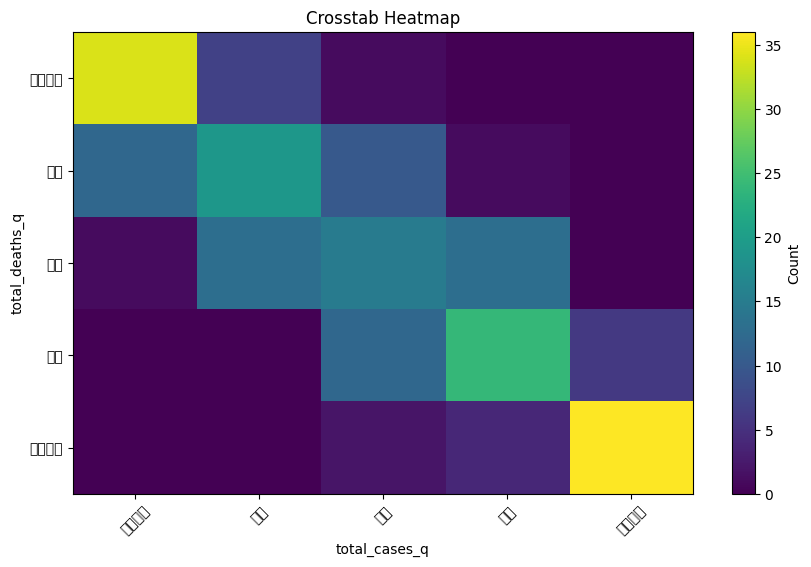

In [114]:
plt.figure(figsize=(10, 6))
plt.title('Crosstab Heatmap')
plt.xlabel('total_cases_q')
plt.ylabel('total_deaths_q')
plt.imshow(cross_table, cmap='viridis', interpolation='nearest', aspect='auto')

# X, Y 축에 레이블 추가
plt.xticks(range(len(cross_table.columns)), cross_table.columns, rotation=45)
plt.yticks(range(len(cross_table.index)), cross_table.index)

# 컬러 바 추가
plt.colorbar(label='Count')

# 그래프 표시
plt.show()